# Classification - Telecom Company Dataset

## Importing Libraries & Dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use("seaborn")

df = pd.read_csv('https://raw.githubusercontent.com/GUC-DM/W2022/main/data/telecom_churn.csv')

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,$29.85/m,$29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,$56.95/m,$1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,$53.85/m,$108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),$42.3/m,$1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,$70.7/m,$151.65,Yes


## Data Inspection

In [3]:
#To check which columns have missing values along with their counts
df.isnull().sum()

customerID           56
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines         0
InternetService       0
OnlineSecurity        0
OnlineBackup          0
DeviceProtection      0
TechSupport           0
StreamingTV           0
StreamingMovies       0
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges        852
Churn                 0
dtype: int64

In [4]:
#To check mathematical data
df.describe()
#We find out that only 2 columns are respresented numerically

,SeniorCitizen,tenure
count,7032.000000,7032.000000
mean,0.162400,32.421786
std,0.368844,24.545260
min,0.000000,1.000000
25%,0.000000,9.000000
50%,0.000000,29.000000
75%,0.000000,55.000000
max,1.000000,72.000000


In [5]:
#To check the data types of the variables
df.info()
#Our assumption is correct as only SeniorCitizen & tenure are of type "int64"

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        6976 non-null   object
 1   gender            7032 non-null   object
 2   SeniorCitizen     7032 non-null   int64 
 3   Partner           7032 non-null   object
 4   Dependents        7032 non-null   object
 5   tenure            7032 non-null   int64 
 6   PhoneService      7032 non-null   object
 7   MultipleLines     7032 non-null   object
 8   InternetService   7032 non-null   object
 9   OnlineSecurity    7032 non-null   object
 10  OnlineBackup      7032 non-null   object
 11  DeviceProtection  7032 non-null   object
 12  TechSupport       7032 non-null   object
 13  StreamingTV       7032 non-null   object
 14  StreamingMovies   7032 non-null   object
 15  Contract          7032 non-null   object
 16  PaperlessBilling  7032 non-null   object
 17  PaymentMethod 

## Data Cleaning

In [6]:
#We drop gender and customer ID as they have no effect on the Churn
df = df.drop(['gender', 'customerID'], axis = 'columns')

In [7]:
#Used later on in the boxplot
df_churn = df.copy()

In [8]:
#Converting the 'Yes' and 'No' to 0, 1
df['Partner'] = df.Partner.eq('Yes').mul(1)

In [9]:
#Converting the 'Yes' and 'No' to 0, 1
df['Dependents'] = df.Dependents.eq('Yes').mul(1)

In [10]:
#Converting the 'Yes' and 'No' to 0, 1
df['PhoneService'] = df.PhoneService.eq('Yes').mul(1)

In [11]:
#Converting the 'Yes' and 'No' to 0, 1
df['PaperlessBilling'] = df.PaperlessBilling.eq('Yes').mul(1)

In [12]:
#Removing the $ sign in monthly charges
df['MonthlyCharges'] = df['MonthlyCharges'].str.replace('$', '', regex = True)

#Removing the /m in monthly charges then converting it from str to float then to int64
df['MonthlyCharges'] = df['MonthlyCharges'].str.replace('/m', '', regex = True).astype(float).astype(int)

In [13]:
#Removing the $ sign in total charges and comverting it from str to float
df['TotalCharges'] = df['TotalCharges'].str.replace('$', '', regex = True).astype(float)

In [14]:
# tenure is the number of months the customer has stayed with the company
# MonthlyCharges is the amount charges per month
# Therefore, to fill the missing amount in TotalCharges we can used the 'fillna' function
# and fill with tenure multiplied by MonthlyCharges
df['TotalCharges'] = df['TotalCharges'].fillna(df['tenure']*df['MonthlyCharges'])

In [15]:
#Converting the 'Yes' and 'No' to 0, 1
df['Churn'] = df.Churn.eq('Yes').mul(1)

In [16]:
#Performing one-hot enconding on all the other categorical variables that has more than 2 subcategories
#We choose to go with this method and perform one-hot enconding because it will enable us to see
#the correlation of each subcategory with the Churn
df = pd.get_dummies(df, columns = ['InternetService', 'Contract', 'PaymentMethod', 'MultipleLines',
                                   'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                                   'StreamingTV', 'StreamingMovies'])


## Finding Attributes Most Correlated with Churn

In [17]:
#Seeing the correlation of each variable with all other variables
corr = df.corr()
corr

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,...,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes
SeniorCitizen,1.000000,0.016957,-0.210550,0.015683,0.008392,0.156258,0.219829,0.102345,0.150541,-0.108276,...,0.059514,0.205254,-0.182519,-0.060577,0.048664,-0.182519,0.105445,0.034196,-0.182519,0.119842
Partner,0.016957,1.000000,0.452269,0.381912,0.018397,-0.013957,0.097890,0.319062,-0.149982,-0.001043,...,0.153556,-0.108875,-0.000286,0.120206,-0.123394,-0.000286,0.124483,-0.117488,-0.000286,0.118108
Dependents,-0.210550,0.452269,1.000000,0.163386,-0.001078,-0.110131,-0.112360,0.064676,-0.163128,0.051593,...,0.013900,-0.171164,0.138383,0.063053,-0.099912,0.138383,-0.016499,-0.078245,0.138383,-0.038375
tenure,0.015683,0.381912,0.163386,1.000000,0.007877,0.004823,0.246876,0.825713,-0.354049,0.013786,...,0.361520,-0.264363,-0.037529,0.325288,-0.246814,-0.037529,0.280264,-0.252890,-0.037529,0.285402
PhoneService,0.008392,0.018397,-0.001078,0.007877,1.000000,0.016696,0.247918,0.112941,0.011691,-0.452255,...,-0.070076,-0.055102,0.171817,-0.095138,-0.123159,0.171817,-0.021383,-0.111273,0.171817,-0.033477
PaperlessBilling,0.156258,-0.013957,-0.110131,0.004823,0.016696,1.000000,0.351923,0.157924,0.191454,-0.063390,...,0.104079,0.229875,-0.320592,0.037536,0.046715,-0.320592,0.224241,0.058987,-0.320592,0.211583
MonthlyCharges,0.219829,0.097890,-0.112360,0.246876,0.247918,0.351923,1.000000,0.651366,0.192922,-0.161408,...,0.482558,0.321213,-0.763146,0.338320,0.016020,-0.763146,0.629624,0.017239,-0.763146,0.627228
TotalCharges,0.102345,0.319062,0.064676,0.825713,0.112941,0.157924,0.651366,1.000000,-0.199381,-0.052071,...,0.522990,-0.084169,-0.375146,0.432999,-0.197144,-0.375146,0.515935,-0.202587,-0.375146,0.520074
Churn,0.150541,-0.149982,-0.163128,-0.354049,0.011691,0.191454,0.192922,-0.199381,1.000000,-0.124141,...,-0.066193,0.336877,-0.227578,-0.164716,0.128435,-0.227578,0.063254,0.130920,-0.227578,0.060860
InternetService_DSL,-0.108276,-0.001043,0.051593,0.013786,-0.452255,-0.063390,-0.161408,-0.052071,-0.124141,1.000000,...,0.145150,0.029418,-0.379912,0.312183,0.304409,-0.379912,0.014973,0.294285,-0.379912,0.025623


In [18]:
#Getting the correlation of the variables with the Churn
corr['Churn'].sort_values(ascending=False, key=lambda x: x.abs())
#We can see that Month_to_Month Contracts & tenure are the most correlated with Churn

Churn                                      1.000000
Contract_Month-to-month                    0.404565
tenure                                    -0.354049
OnlineSecurity_No                          0.342235
TechSupport_No                             0.336877
InternetService_Fiber optic                0.307463
Contract_Two year                         -0.301552
PaymentMethod_Electronic check             0.301455
OnlineBackup_No                            0.267595
DeviceProtection_No                        0.252056
InternetService_No                        -0.227578
TechSupport_No internet service           -0.227578
StreamingMovies_No internet service       -0.227578
StreamingTV_No internet service           -0.227578
DeviceProtection_No internet service      -0.227578
OnlineBackup_No internet service          -0.227578
OnlineSecurity_No internet service        -0.227578
TotalCharges                              -0.199381
MonthlyCharges                             0.192922
PaperlessBil

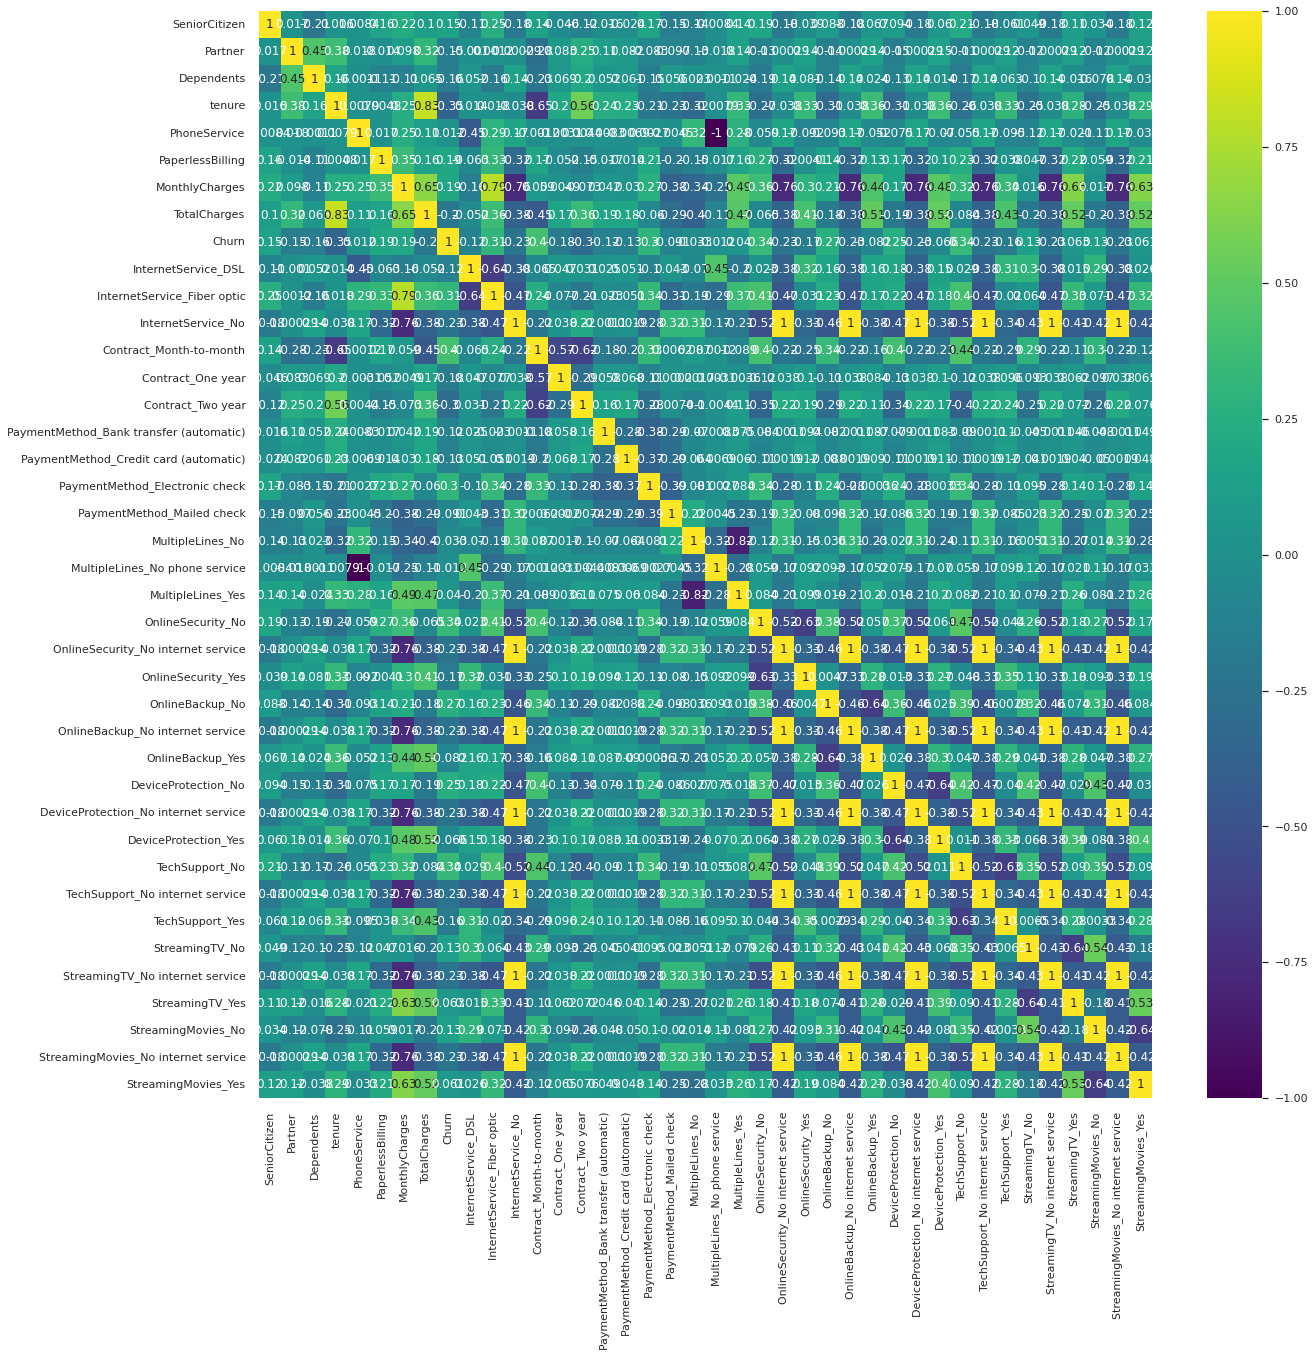

In [19]:
#Performing a heatmap to see the correlation of all variables with each other
sns.set(rc={'figure.figsize':(20,20)})
sns.heatmap(corr, cmap='viridis', annot = True);

The most correlated attributes are: Month-to-Month Contracts & Tenure

**Understanding Which Payment Methods Have the Highest Churn Rate**

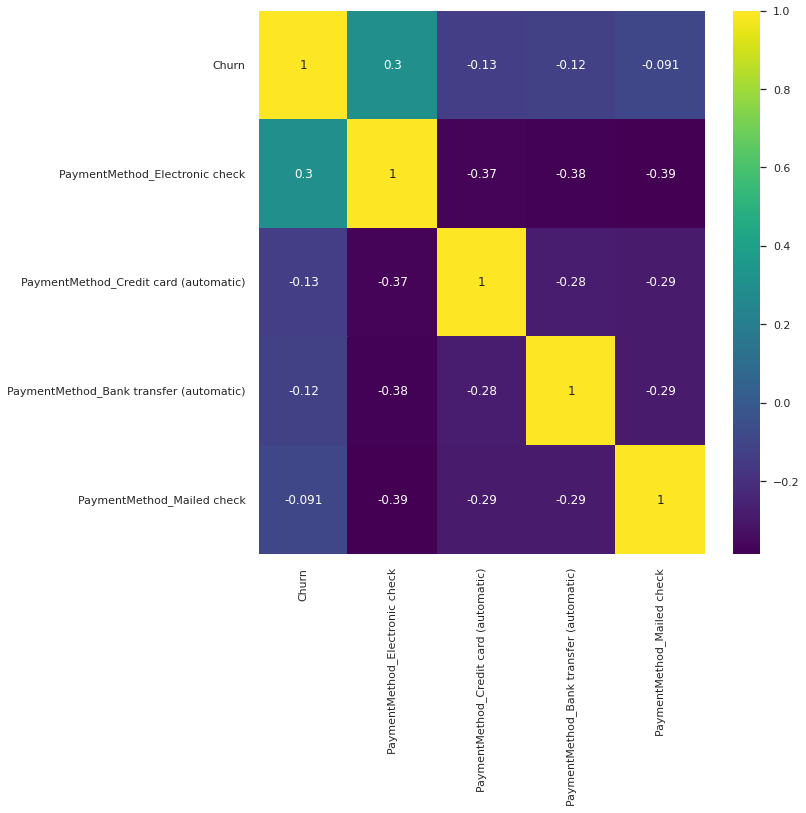

In [20]:
sns.set(rc={'figure.figsize':(10,10)})

#Heatmaps take inputs of type 'dataframe' only
#Therefore, if we want to create a heatmap of the Payment Methods with the Churn
#Then we can create a new df that includes the variables of Payment Methods & Churn
#We called it df1
df1 = df[['Churn','PaymentMethod_Electronic check', 'PaymentMethod_Credit card (automatic)', 
          'PaymentMethod_Bank transfer (automatic)', 'PaymentMethod_Mailed check']]

#We then created corr1 which is the correlation of df1         
corr1 = df1.corr()
sns.heatmap(corr1, cmap='viridis', annot = True)

The payment method that has the highest churn rate is Electronic Check.

**Finding After How Many Months Customers Churn**

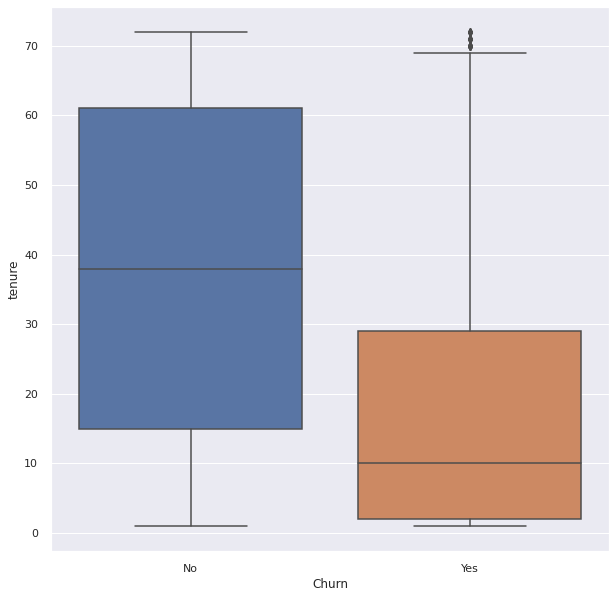

In [21]:
sns.boxplot(data = df_churn, x = 'Churn', y = 'tenure')

#**Minimum: 1 Months**
#**1st Quantile: 2 Months**
#**Median: 10 Months**
#**3rd Quantile: 29 Months**
#**Maximum: 69 Months**

Customer commonly churn after 10 months.

## Data Preparation for Modelling

In [23]:
df_encoded = df.copy()

In [24]:
#Performing a train split test where the data is split into testing and training
from sklearn.model_selection import train_test_split

X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Modelling

In [25]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [26]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:")
        print("===============================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:")
        print("===============================================")
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [27]:
print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 99.78%
_______________________________________________
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.997789     0.997698  0.997765     0.997744      0.997765
recall        0.999170     0.993884  0.997765     0.996527      0.997765
f1-score      0.998479     0.995787  0.997765     0.997133      0.997764
support    3614.000000  1308.000000  0.997765  4922.000000   4922.000000
_______________________________________________
Confusion Matrix: 
 [[3611    3]
 [   8 1300]]

Test Result:
Accuracy Score: 73.65%
_______________________________________________
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.827723    0.504202  0.736493     0.665962      0.741706
recall        0.809555    0.534759  0.736493     0.672157      0.736493
f1-score      0.818538    0.519031  0.736493     0.668785      0.738906
support    1549.000000  561.000000  

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


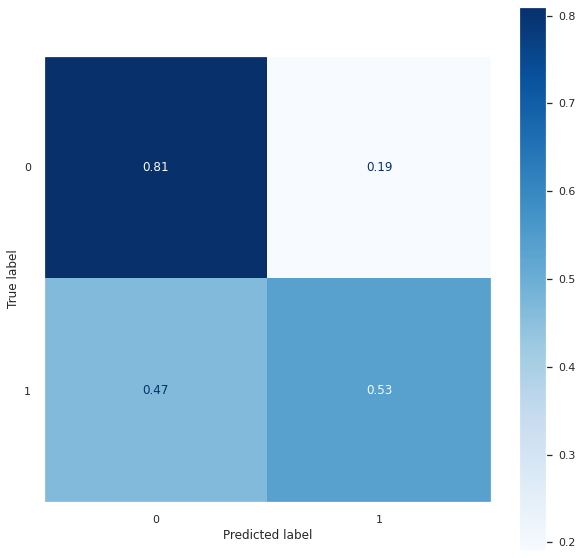

In [28]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(tree_clf, X_test, y_test, cmap='Blues', normalize='true')
plt.grid(False)

In [29]:
#As we look into the values of the 'Churn' when it is equal to 'Yes' 
#we will look at the precision and recall not the accuracy
#because one class is more important than the other
from sklearn.metrics import f1_score, precision_score, recall_score

pred = tree_clf.predict(X_test)

print('Precision: ', precision_score(y_test,pred))
print('=======================================')
print('Recall: ', recall_score(y_test,pred))
print('=======================================')
print('F1_score: ', f1_score(y_test,pred))

Precision:  0.5042016806722689
Recall:  0.5347593582887701
F1_score:  0.5190311418685122


# **As we look into the values of the 'Churn' when it is equal to 'Yes', we will look at the precision and recall not the accuracy because one class is more important than the other.**

### Tree Visualization

In [30]:
import graphviz
from sklearn.tree import export_graphviz
dot_data = export_graphviz(tree_clf, out_file=None,
                           feature_names=X.columns,
                           class_names=['No', 'Yes'],
                           filled=True, rounded=True,
                           special_characters=True) 
graph = graphviz.Source(dot_data)
graph

## Evaluation

In [31]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

clf = DecisionTreeClassifier(random_state=42)
# since we have a relatively small dataset (~1000 records), 
# we'll use a low number of splits
skf = StratifiedKFold(n_splits=3)

# Note how cross validation is applied on the training dataset
# The testing dataset is always left out and used -only- in the final evaluation
scores = cross_val_score(clf, X_train, y_train, cv=skf, scoring='f1')
scores

array([0.50732807, 0.53982301, 0.51287794])

In [32]:
print("Score: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Score: 0.52 (+/- 0.03)


## Extra - Modelling with KNN

In [33]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']
  
# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(
             X, y, test_size = 0.2, random_state=42)
  
knn = KNeighborsClassifier(n_neighbors=7)
  
knn.fit(X_train, y_train)

from sklearn.metrics import f1_score, precision_score, recall_score

y_pred = knn.predict(X_test)

print('Accuracy of the KNN model: ', knn.score(X_test, y_test))
print('=======================================')
print('Precision of the KNN model: ', precision_score(y_test,y_pred))
print('=======================================')
print('Recall of the KNN model: ', recall_score(y_test,y_pred))
print('=======================================')
print('F1_score of the KNN model: ', f1_score(y_test,y_pred))

Accuracy of the KNN model:  0.7782515991471215
Precision of the KNN model:  0.6156716417910447
Recall of the KNN model:  0.4411764705882353
F1_score of the KNN model:  0.5140186915887849


This model is better in terms of its precision as it has a 61.5% precision rate which is a lot higher than the final precision of the decision tree model which was just above 53%.

